Progetto: **Classificazione di testi descrittivi per destinazione d'uso, inerenti ai beni sottoposti ad aste giudiziarie italiane.**

Studente: **Alessandro Monolo** | *10439147*

Relatore: Marco Brambilla

Referente aziendale: Simone Redaelli

Master: Data Science & Artificial Intelligence

Università: Politecnico di Milano

<hr style="border:1px solid black">

## Fill Null Values per specifiche destinazioni d'uso e drop delle null values da data frame

- **1.** Mostro la **distribuzione delle null values** tramite heatmap;


- **2.** Mostro la **distribuzione dei beni** tra le **destinazioni d'uso** tra i beni del data frame;


- **3.** Mappo con la **media aritmetica** le **null values** presenti nelle colonne numeriche per la destinazione d'uso **Agricultural Building**;


- **4.** Mappo con la **media aritmetica** le **null values** presenti nelle colonne numeriche per la destinazione d'uso **Hotel**;


- **5.** **Drop** di tutte le **Null Values** da data frame;


- **6.** **Check** del data frame ottenuto dopo l'eliminazione di tutte le null values & **Conclusioni**;


- **7.** **Export** del data frame in file CSV.

<hr style="border:1px solid black">

**Importo le librerie che mi servono:**

In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

#### Set pandas options:

In [2]:
pd.set_option('display.max_colwidth', None)
pd.options.display.max_rows = 5000
pd.options.display.max_columns = 1000
pd.options.display.float_format = '{:.2f}'.format

**Importo file CSV**

In [3]:
df = pd.read_csv("D:\\Master_Cefriel_DS_AI_Monolo\\0_Project_Work\\Dataset\\5_Dataset_FillNullValues_&_DropNa\\Dataset_FillNullValues_&_DropNa.csv",
                 dtype={'Numero_Lotto' : 'Int64'})

In [4]:
print("- Attualmente il data fram è composto da N° beni: ", '\033[1m','\033[15;31;43m', df.shape[0], '\033[0m')

- Attualmente il data fram è composto da N° beni:    193181 


### 1 - Mostro la distribuzione delle null values tra le varrie colonne del data frame

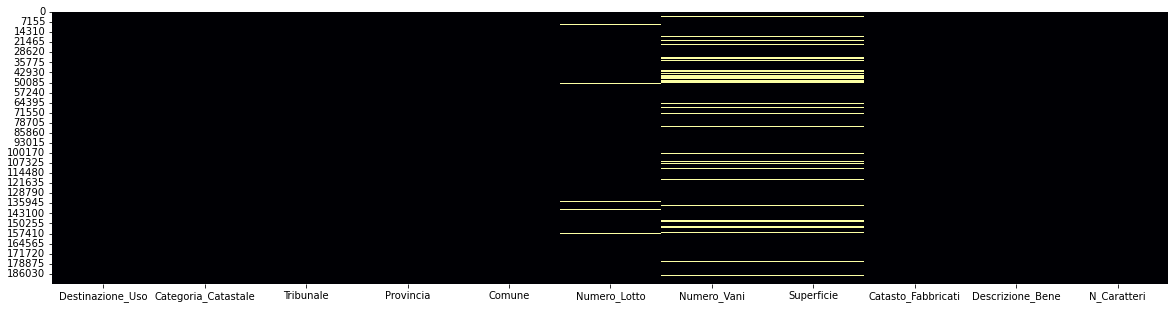

In [5]:
plt.figure(figsize = (20, 5))
sns.heatmap(df.isnull(), cbar = False, cmap = 'inferno')
plt.show()

- Le uniche colonne del dataframe che presentano null values sono le seguenti:
    - **Numero Lotto**;
    - **Numero Vani**;
    - **Superficie**.

### 2 - Mostro la divisione delle destinazioni d'uso tra i beni del data frame ottenuto finora:

In [6]:
df['Destinazione_Uso'].value_counts()

RESIDENTIAL              149973
STORAGE                   18937
RETAIL                     8702
LAND                       8071
INDUSTRIAL                 6388
HOTEL                       560
AGRICULTURAL BUILDING       550
Name: Destinazione_Uso, dtype: int64

- **Considerazioni:**
    - Le due destinazioni d'uso più **sotto rappresentate** sono **Agricultural Building** & **Hotel**;
    - Al fine di evitare un loro ulteriore ridimensionamento, devo mappare ove possibile, le **Null Values** presenti all'interno delle colonne che presentano almeno una Null Values, Ovvero: '**Numero_Lotto**', '**Numero_Vani**', '**Superficie**';
    - Per poter mappare le Null Values in questi tre campi, per queste due destinazioni d'uso, utilizzerò la **media aritmetica**.

### 3 - Fill Null Values per la destinazione d'uso: AGRICULTURAL BUILDING

- Controllo **se esitono più categorie catastali** all'interno della destinazione d'uso Agricultural Building:

In [7]:
print("- ", df[df['Destinazione_Uso'] == "AGRICULTURAL BUILDING"]['Categoria_Catastale'].value_counts())

-  A6    550
Name: Categoria_Catastale, dtype: int64


- Essendo **tutte relative alla stessa categoria catastale A6** posso generalizzare con la media aritmetica.

In [8]:
print(df[df['Destinazione_Uso'] == "AGRICULTURAL BUILDING"].isnull().sum())

Destinazione_Uso        0
Categoria_Catastale     0
Tribunale               0
Provincia               0
Comune                  0
Numero_Lotto            5
Numero_Vani            50
Superficie             50
Catasto_Fabbricati      0
Descrizione_Bene        0
N_Caratteri             0
dtype: int64


- Ci sono quindi da mappare **5 Null Values** per la colonna "**Numero_Lotto**", **50 null values** per le colonne "**Numero_Vani**" e "**Superficie**";
- Quindi calcolo per ogni colonna con null values la **media espressa in integer** value e mappo le rispettive colonne con i valori estratti.

In [9]:
# Calcolo il numero medio lotto per la categoria Agricultural Building:
mean_agri_lotti = int(df[df['Destinazione_Uso'] == 'AGRICULTURAL BUILDING']['Numero_Lotto'].mean())
print("- Media numero lotto per destinazione d'uso Agricultural Building: ", mean_agri_lotti)
# Calcolo il numero medio di vani per la categoria Agricultural Building:
mean_agri_vani = int(df[df['Destinazione_Uso'] == 'AGRICULTURAL BUILDING']['Numero_Vani'].mean())
print("- Media numero vani per destinazione d'uso Agricultural Building: ", mean_agri_vani)
# Calcolo la superficie media per la categoria Agricultural Building:
mean_agri_sup = int(df[df['Destinazione_Uso'] == 'AGRICULTURAL BUILDING']['Superficie'].mean())
print("- Media superficie per destinazione d'uso Agricultural Building: ", mean_agri_sup)

# Mappo la colonna Numero lotto con la media ottenuta:
df.loc[(df['Destinazione_Uso'] == 'AGRICULTURAL BUILDING') & (df['Numero_Lotto'].isnull()), 'Numero_Lotto'] = mean_agri_lotti
# Mappo la colonna Numero vani con la media ottenuta:
df.loc[(df['Destinazione_Uso'] == 'AGRICULTURAL BUILDING') & (df['Numero_Vani'].isnull()), 'Numero_Vani'] = mean_agri_vani
# Mappo la colonna superficie con la media ottenuta:
df.loc[(df['Destinazione_Uso'] == 'AGRICULTURAL BUILDING') & (df['Superficie'].isnull()), 'Superficie'] = mean_agri_sup

- Media numero lotto per destinazione d'uso Agricultural Building:  2
- Media numero vani per destinazione d'uso Agricultural Building:  4
- Media superficie per destinazione d'uso Agricultural Building:  84


- **Check** se ci sono ancora Null Values nelle colonne menzionate per la destinazione d'uso **Agricultural Building**.

In [10]:
print(df[df['Destinazione_Uso'] == "AGRICULTURAL BUILDING"].isnull().sum())

Destinazione_Uso       0
Categoria_Catastale    0
Tribunale              0
Provincia              0
Comune                 0
Numero_Lotto           0
Numero_Vani            0
Superficie             0
Catasto_Fabbricati     0
Descrizione_Bene       0
N_Caratteri            0
dtype: int64


### 4 - Fill Null Values per la destinazione d'uso: HOTEL

- Controllo **se esitono più categorie catastali** all'interno della destinazione d'uso Hotel:

In [11]:
print("- ", df[df['Destinazione_Uso'] == "HOTEL"]['Categoria_Catastale'].value_counts())

-  D2    560
Name: Categoria_Catastale, dtype: int64


- Essendo **tutte relative alla stessa categoria catastale D2** posso generalizzare con la media aritmetica.

In [12]:
print(df[df['Destinazione_Uso'] == "HOTEL"].isnull().sum())

Destinazione_Uso         0
Categoria_Catastale      0
Tribunale                0
Provincia                0
Comune                   0
Numero_Lotto             3
Numero_Vani            384
Superficie             384
Catasto_Fabbricati       0
Descrizione_Bene         0
N_Caratteri              0
dtype: int64


- Ci sono quindi da mappare **3 Null Values** per la colonna "**Numero_Lotto**", **384 null values** per le colonne "**Numero_Vani**" e "**Superficie**";
- Quindi calcolo per ogni colonna con null values la **media espressa in integer** value e mappo le rispettive colonne con i valori estratti.

In [13]:
# Calcolo il numero medio lotto per la categoria HOTEL:
mean_hotel_lotti = int(df[df['Destinazione_Uso'] == 'HOTEL']['Numero_Lotto'].mean())
print("- Media numero lotto per destinazione d'uso HOTEL: ", mean_hotel_lotti)
# Calcolo il numero medio di vani per la categoria HOTEL:
mean_hotel_vani = int(df[df['Destinazione_Uso'] == 'HOTEL']['Numero_Vani'].mean())
print("- Media numero vani per destinazione d'uso HOTEL: ", mean_hotel_vani)
# Calcolo la superficie media per la categoria HOTEL:
mean_hotel_sup = int(df[df['Destinazione_Uso'] == 'HOTEL']['Superficie'].mean())
print("- Media superficie per destinazione d'uso HOTEL: ", mean_hotel_sup)

# Mappo la colonna Numero lotto con la media ottenuta:
df.loc[(df['Destinazione_Uso'] == 'HOTEL') & (df['Numero_Lotto'].isnull()), 'Numero_Lotto'] = mean_hotel_lotti
# Mappo la colonna Numero vani con la media ottenuta:
df.loc[(df['Destinazione_Uso'] == 'HOTEL') & (df['Numero_Vani'].isnull()), 'Numero_Vani'] = mean_hotel_vani
# Mappo la colonna superficie con la media ottenuta:
df.loc[(df['Destinazione_Uso'] == 'HOTEL') & (df['Superficie'].isnull()), 'Superficie'] = mean_hotel_sup

- Media numero lotto per destinazione d'uso HOTEL:  1
- Media numero vani per destinazione d'uso HOTEL:  27
- Media superficie per destinazione d'uso HOTEL:  558


- **Check** se ci sono ancora Null Values nelle colonne menzionate per la destinazione d'uso **Hotel**.

In [14]:
print(df[df['Destinazione_Uso'] == "HOTEL"].isnull().sum())

Destinazione_Uso       0
Categoria_Catastale    0
Tribunale              0
Provincia              0
Comune                 0
Numero_Lotto           0
Numero_Vani            0
Superficie             0
Catasto_Fabbricati     0
Descrizione_Bene       0
N_Caratteri            0
dtype: int64


### 5 - Elimino tutte le righe che presentano almeno una null values nelle colonne del data frame

- Elimino tutte le righe del data frame che presentano almeno una null values in una colonna del data frame.

In [15]:
df_not_null = df.dropna()

- Mostro nuovamente la distribuzione dei beni tra le varie destinazioni d'suo

In [16]:
df_not_null['Destinazione_Uso'].value_counts()

RESIDENTIAL              132223
STORAGE                   16915
RETAIL                     7746
LAND                       5812
INDUSTRIAL                 2269
HOTEL                       560
AGRICULTURAL BUILDING       550
Name: Destinazione_Uso, dtype: int64

- Le **destinazioni d'uso Agricultural Building & Hotel** non hanno subito alcuna eliminazione di beni, dopo che le relative null values sono state bonificate utilizzando la media aritmetica per categoria.

### 6 - Check del data frame ottenuto & Relative conclusioni

In [17]:
# Mostro quanti beni ho ottenuto all'interno del data frame dopo il drop delle null values:
print("- Il data frame è ora composto da N° beni:", '\033[1m', '\033[15;31;43m', df_not_null.shape[0], '\033[0m')

# Mostro il totale dei beni eliminati durante il drop:
print("- Sono stati quindi eliminati", '\033[1m', '\033[15;31;43m', 193181 - 166075, '\033[0m',
      "beni che presentavano almeno una Null Values nelle colonne del data frame.")

- Il data frame è ora composto da N° beni:   166075 
- Sono stati quindi eliminati   27106  beni che presentavano almeno una Null Values nelle colonne del data frame.


In [18]:
df_not_null.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 166075 entries, 0 to 193180
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Destinazione_Uso     166075 non-null  object 
 1   Categoria_Catastale  166075 non-null  object 
 2   Tribunale            166075 non-null  object 
 3   Provincia            166075 non-null  object 
 4   Comune               166075 non-null  object 
 5   Numero_Lotto         166075 non-null  Int64  
 6   Numero_Vani          166075 non-null  float64
 7   Superficie           166075 non-null  float64
 8   Catasto_Fabbricati   166075 non-null  bool   
 9   Descrizione_Bene     166075 non-null  object 
 10  N_Caratteri          166075 non-null  int64  
dtypes: Int64(1), bool(1), float64(2), int64(1), object(6)
memory usage: 14.3+ MB


- Il data frame è composto da **166.075 righe** e da **11 colonne**.
- **6 colonne sono Object**, quindi composte da dati testuali o categorici;
- **1 colonna è di tipo Boolean**, inerente al fatto se il bene in questione è un fabbricato o un terreo (*Catasto_Fabbricato*);
- **2 colonne float**, la prima per descrivere il numero dei vani e la seconda per la superficie del bene;
- **2 colonne integer**, la prima per descrivere il N° del lotto in questione e la seconda per il N° di caratteri che vengono contanti nella descrizione del bene.

In [19]:
df_not_null.isnull().sum()

Destinazione_Uso       0
Categoria_Catastale    0
Tribunale              0
Provincia              0
Comune                 0
Numero_Lotto           0
Numero_Vani            0
Superficie             0
Catasto_Fabbricati     0
Descrizione_Bene       0
N_Caratteri            0
dtype: int64

- **Non esistono** più all'interno del data frame **null values** tra le varie colonne che la compongono.

In [20]:
df_not_null.describe()

,Numero_Lotto,Numero_Vani,Superficie,N_Caratteri
count,166075.00,166075.00,166075.00,166075.00
mean,5.33,12.36,247.76,236.11
std,16.08,122.33,2447.02,289.89
min,1.00,0.00,1.00,3.00
25%,1.00,1.50,33.00,80.00
50%,1.00,4.50,90.00,159.00
75%,3.00,6.50,130.00,292.00
max,912.00,13595.00,271900.00,2998.00


- **Mediamente i beni** sono composti (considerando ogni destinazione d'uso) da **12 vani**, su circa **247 Mq**;
- Il **bene più piccolo** in dimensioni è di 1 Mq, mentre il più grande di 271.900 Mq;
- Il **numero di vani più alto** presente è pari a 13.595, ovvero 271.900 Mq, probabilmente un outliers da esaminare più avanti durante la fase di **Exploration Data Analysis**;
- Infine, i **testi sono mediamente lunghi 236 caratteri** per descrizione del bene, dove il minimo è composto da 3 caratteri, come i box precedentemente visti, oppure 2.998 come lunghezza massima, dopo aver eliminato quelli oltre i 3000 caratteri.

### 7 - Export data frame file CSV:

In [21]:
df_csv = df_not_null.to_csv("D:\\Master_Cefriel_DS_AI_Monolo\\0_Project_Work\\Dataset\\6_Dataset_EDA_Pre_Bilanciamento\\Dataset_EDA_Pre_Bilanciamento.csv",
                   index=False)